# PROJET DE SEGMENTATION CLIENT

## Importation des librairies necessaires

In [1]:
import pandas as pd
#import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Instructions de connexion au serveur SQL Server 
L'objectif est d'établir une connexion nous permettant d'écrire une requête SQL pour récupérer des données dans le notebook afin de pouvoir les manipuler en python.

In [2]:
class SQL :
    def __init__(self):
        self = self
        
    def pd_query(self, query):
        self.q = query
        conn = pyodbc.connect()
        cursor = conn.cursor()
        df = pd.read_sql_query(self.q,conn)
        conn.close()
        return(df)

In [3]:
max = SQL()

Nous pouvons désormais sortirs nos données de SQL dans un dataframe.

In [4]:
clients_actifs = max.pd_query("SELECT * FROM MH_CLIENTS_ACTIFS")

In [5]:
print(clients_actifs.shape)

clients_actifs.head()

(1087456, 14)


,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,CdesI,CdesT,CdesC,Age
0,000014366547,N,N,0,0,0,3,268.68,153.88,8.99,0,0,3,73.0
1,000039562766,O,N,1,1,2,2,180.68,83.92,0.00,2,0,0,59.0
2,000090446886,O,N,2,2,0,2,99.94,18.76,15.98,0,2,0,68.0
3,000014608249,N,N,0,0,0,1,82.34,27.46,0.00,0,0,1,64.0
4,719336101393,O,O,54,243,28,5,377.47,288.98,6.99,5,0,0,70.0


## Analyse exploratoire

Afin de mieux comprendre nos données avant de les transformer ou de les intégrer dans un algorithme, nous allons réaliser des analyse univariées. 

In [6]:
clients_actifs[['Email','Optin']].value_counts()

Email  Optin
O      O        448350
       N        441842
N      N        197264
dtype: int64

(0.0, 2000.0)

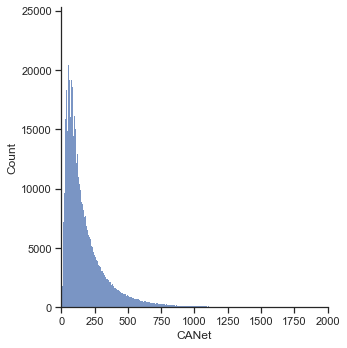

In [7]:
sns.set_theme(style="ticks")

sns.displot(x="CANet", data=clients_actifs[['CANet','RemiseMkg','PFF']])
plt.xlim(0,2000)

(0.0, 1000.0)

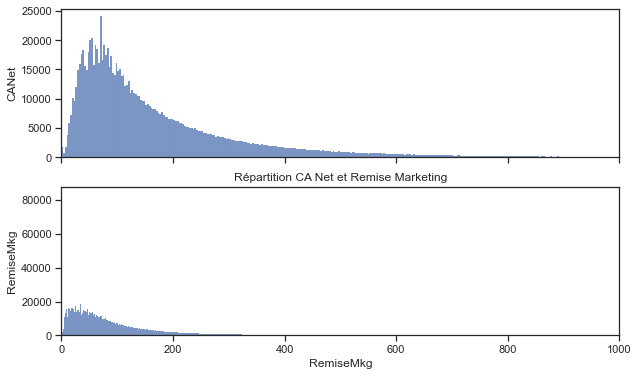

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

sns.histplot(x="CANet", data=clients_actifs[['CANet','RemiseMkg','PFF']], ax=ax1)
ax1.set_ylabel("CANet")

sns.histplot(x="RemiseMkg", data=clients_actifs[['CANet','RemiseMkg','PFF']], ax=ax2)
ax2.set_ylabel("RemiseMkg")

plt.title("Répartition CA Net et Remise Marketing")
plt.xlim(0,1000)

In [9]:
clients_actifs

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,CdesI,CdesT,CdesC,Age
0,000014366547,N,N,0,0,0,3,268.68,153.88,8.99,0,0,3,73.0
1,000039562766,O,N,1,1,2,2,180.68,83.92,0.00,2,0,0,59.0
2,000090446886,O,N,2,2,0,2,99.94,18.76,15.98,0,2,0,68.0
3,000014608249,N,N,0,0,0,1,82.34,27.46,0.00,0,0,1,64.0
4,719336101393,O,O,54,243,28,5,377.47,288.98,6.99,5,0,0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087451,000034745986,O,N,0,0,0,1,209.79,89.91,3.49,0,0,1,69.0
1087452,000090782789,O,N,2,5,0,2,43.96,18.84,10.48,0,0,2,56.0
1087453,000023382555,O,O,0,103,1,5,140.53,55.87,27.95,4,1,0,64.0
1087454,000025500423,O,N,2,2,0,2,93.92,63.39,0.00,0,0,2,59.0


Text(0.5, 1.0, 'Répartition du nombre de commandes effectuées sur 2 ans')

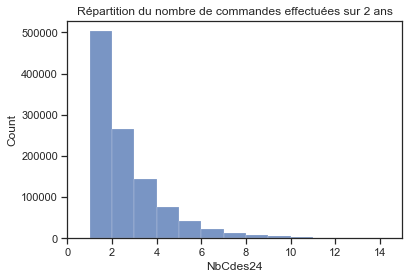

In [10]:
sns.histplot(x="NbCdes24", data=clients_actifs, binwidth=1)
plt.xlim(0,15)
plt.title("Répartition du nombre de commandes effectuées sur 2 ans")

(0.0, 300.0)

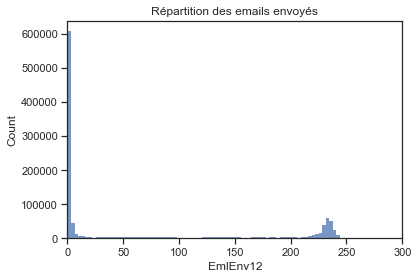

In [11]:
sns.histplot(x="EmlEnv12", data=clients_actifs)

plt.title("Répartition des emails envoyés")
plt.xlim(0,300)

(0.0, 100.0)

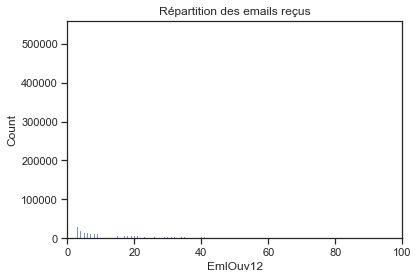

In [12]:
sns.histplot(x="EmlOuv12", data=clients_actifs)

plt.title("Répartition des emails reçus")
plt.xlim(0,100)

In [13]:
clients_actifs.EmlOuv12.value_counts().head(10)

0    532006
1    130822
2     61940
3     29812
4     18462
5     14511
6     12537
7     11497
8     10980
9     10028
Name: EmlOuv12, dtype: int64

In [14]:
clients_actifs.EmlEnv12.value_counts().head(10)

0      367833
2      110601
1       72972
3       56460
4       23021
234     20341
233     19942
235     19271
232     18689
236     17414
Name: EmlEnv12, dtype: int64

In [15]:
clients_actifs

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,CdesI,CdesT,CdesC,Age
0,000014366547,N,N,0,0,0,3,268.68,153.88,8.99,0,0,3,73.0
1,000039562766,O,N,1,1,2,2,180.68,83.92,0.00,2,0,0,59.0
2,000090446886,O,N,2,2,0,2,99.94,18.76,15.98,0,2,0,68.0
3,000014608249,N,N,0,0,0,1,82.34,27.46,0.00,0,0,1,64.0
4,719336101393,O,O,54,243,28,5,377.47,288.98,6.99,5,0,0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087451,000034745986,O,N,0,0,0,1,209.79,89.91,3.49,0,0,1,69.0
1087452,000090782789,O,N,2,5,0,2,43.96,18.84,10.48,0,0,2,56.0
1087453,000023382555,O,O,0,103,1,5,140.53,55.87,27.95,4,1,0,64.0
1087454,000025500423,O,N,2,2,0,2,93.92,63.39,0.00,0,0,2,59.0


## Préparation des données
### Feature engineering

In [16]:
clients_actifs["CATarif"] = clients_actifs["CANet"] + clients_actifs["RemiseMkg"]
clients_actifs.head()

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,CdesI,CdesT,CdesC,Age,CATarif
0,000014366547,N,N,0,0,0,3,268.68,153.88,8.99,0,0,3,73.0,422.56
1,000039562766,O,N,1,1,2,2,180.68,83.92,0.00,2,0,0,59.0,264.60
2,000090446886,O,N,2,2,0,2,99.94,18.76,15.98,0,2,0,68.0,118.70
3,000014608249,N,N,0,0,0,1,82.34,27.46,0.00,0,0,1,64.0,109.80
4,719336101393,O,O,54,243,28,5,377.47,288.98,6.99,5,0,0,70.0,666.45


In [17]:
clients_actifs["%RemiseMkg"] = (clients_actifs["RemiseMkg"]/clients_actifs["CATarif"]*100).round(0)

clients_actifs.head()

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,CdesI,CdesT,CdesC,Age,CATarif,%RemiseMkg
0,000014366547,N,N,0,0,0,3,268.68,153.88,8.99,0,0,3,73.0,422.56,36.0
1,000039562766,O,N,1,1,2,2,180.68,83.92,0.00,2,0,0,59.0,264.60,32.0
2,000090446886,O,N,2,2,0,2,99.94,18.76,15.98,0,2,0,68.0,118.70,16.0
3,000014608249,N,N,0,0,0,1,82.34,27.46,0.00,0,0,1,64.0,109.80,25.0
4,719336101393,O,O,54,243,28,5,377.47,288.98,6.99,5,0,0,70.0,666.45,43.0


In [18]:
clients_actifs["%Internet"] = (clients_actifs["CdesI"]/clients_actifs["NbCdes24"]*100).round(0)
clients_actifs["%Telephone"] = (clients_actifs["CdesT"]/clients_actifs["NbCdes24"]*100).round(0)
clients_actifs["%Courrier"] = (clients_actifs["CdesC"]/clients_actifs["NbCdes24"]*100).round(0)

clients_actifs.head()

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,CdesI,CdesT,CdesC,Age,CATarif,%RemiseMkg,%Internet,%Telephone,%Courrier
0,000014366547,N,N,0,0,0,3,268.68,153.88,8.99,0,0,3,73.0,422.56,36.0,0.0,0.0,100.0
1,000039562766,O,N,1,1,2,2,180.68,83.92,0.00,2,0,0,59.0,264.60,32.0,100.0,0.0,0.0
2,000090446886,O,N,2,2,0,2,99.94,18.76,15.98,0,2,0,68.0,118.70,16.0,0.0,100.0,0.0
3,000014608249,N,N,0,0,0,1,82.34,27.46,0.00,0,0,1,64.0,109.80,25.0,0.0,0.0,100.0
4,719336101393,O,O,54,243,28,5,377.47,288.98,6.99,5,0,0,70.0,666.45,43.0,100.0,0.0,0.0


In [19]:
clients_actifs["MMC"] = ((clients_actifs["CANet"]+clients_actifs["PFF"])/clients_actifs["NbCdes24"]).round(2)

clients_actifs.head()

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,CdesI,CdesT,CdesC,Age,CATarif,%RemiseMkg,%Internet,%Telephone,%Courrier,MMC
0,000014366547,N,N,0,0,0,3,268.68,153.88,8.99,0,0,3,73.0,422.56,36.0,0.0,0.0,100.0,92.56
1,000039562766,O,N,1,1,2,2,180.68,83.92,0.00,2,0,0,59.0,264.60,32.0,100.0,0.0,0.0,90.34
2,000090446886,O,N,2,2,0,2,99.94,18.76,15.98,0,2,0,68.0,118.70,16.0,0.0,100.0,0.0,57.96
3,000014608249,N,N,0,0,0,1,82.34,27.46,0.00,0,0,1,64.0,109.80,25.0,0.0,0.0,100.0,82.34
4,719336101393,O,O,54,243,28,5,377.47,288.98,6.99,5,0,0,70.0,666.45,43.0,100.0,0.0,0.0,76.89


(0.0, 500.0)

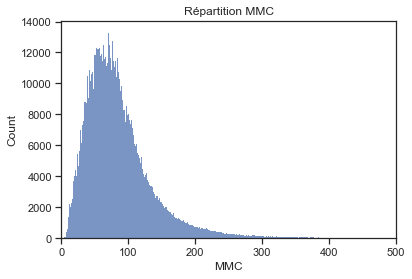

In [20]:
sns.histplot(x="MMC", data=clients_actifs)

plt.title("Répartition MMC")
plt.xlim(0,500)

In [21]:
clients_actifs["Email"] = clients_actifs["Email"].replace(['N'],0)
clients_actifs["Optin"] = clients_actifs["Optin"].replace(['N'],0)
clients_actifs["Email"] = clients_actifs["Email"].replace(['O'],1)
clients_actifs["Optin"] = clients_actifs["Optin"].replace(['O'],1)

clients_actifs.head()

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,CdesI,CdesT,CdesC,Age,CATarif,%RemiseMkg,%Internet,%Telephone,%Courrier,MMC
0,000014366547,0,0,0,0,0,3,268.68,153.88,8.99,0,0,3,73.0,422.56,36.0,0.0,0.0,100.0,92.56
1,000039562766,1,0,1,1,2,2,180.68,83.92,0.00,2,0,0,59.0,264.60,32.0,100.0,0.0,0.0,90.34
2,000090446886,1,0,2,2,0,2,99.94,18.76,15.98,0,2,0,68.0,118.70,16.0,0.0,100.0,0.0,57.96
3,000014608249,0,0,0,0,0,1,82.34,27.46,0.00,0,0,1,64.0,109.80,25.0,0.0,0.0,100.0,82.34
4,719336101393,1,1,54,243,28,5,377.47,288.98,6.99,5,0,0,70.0,666.45,43.0,100.0,0.0,0.0,76.89


In [22]:
clients_actifs['PPF_moyenne'] = (clients_actifs['PFF']/clients_actifs['NbCdes24']).round(2)

clients_actifs.head()

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,...,CdesT,CdesC,Age,CATarif,%RemiseMkg,%Internet,%Telephone,%Courrier,MMC,PPF_moyenne
0,000014366547,0,0,0,0,0,3,268.68,153.88,8.99,...,0,3,73.0,422.56,36.0,0.0,0.0,100.0,92.56,3.00
1,000039562766,1,0,1,1,2,2,180.68,83.92,0.00,...,0,0,59.0,264.60,32.0,100.0,0.0,0.0,90.34,0.00
2,000090446886,1,0,2,2,0,2,99.94,18.76,15.98,...,2,0,68.0,118.70,16.0,0.0,100.0,0.0,57.96,7.99
3,000014608249,0,0,0,0,0,1,82.34,27.46,0.00,...,0,1,64.0,109.80,25.0,0.0,0.0,100.0,82.34,0.00
4,719336101393,1,1,54,243,28,5,377.47,288.98,6.99,...,0,0,70.0,666.45,43.0,100.0,0.0,0.0,76.89,1.40


In [23]:
clients_actifs['Taux_Ouv_Email'] = (clients_actifs['EmlOuv12']/clients_actifs['EmlEnv12']*100).round(0)
clients_actifs["Taux_Ouv_Email"] = clients_actifs["Taux_Ouv_Email"].replace([np.nan],0)

clients_actifs.head()

,Numcli,Email,Optin,EmlOuv12,EmlEnv12,VisWeb12,NbCdes24,CANet,RemiseMkg,PFF,...,CdesC,Age,CATarif,%RemiseMkg,%Internet,%Telephone,%Courrier,MMC,PPF_moyenne,Taux_Ouv_Email
0,000014366547,0,0,0,0,0,3,268.68,153.88,8.99,...,3,73.0,422.56,36.0,0.0,0.0,100.0,92.56,3.00,0.0
1,000039562766,1,0,1,1,2,2,180.68,83.92,0.00,...,0,59.0,264.60,32.0,100.0,0.0,0.0,90.34,0.00,100.0
2,000090446886,1,0,2,2,0,2,99.94,18.76,15.98,...,0,68.0,118.70,16.0,0.0,100.0,0.0,57.96,7.99,100.0
3,000014608249,0,0,0,0,0,1,82.34,27.46,0.00,...,1,64.0,109.80,25.0,0.0,0.0,100.0,82.34,0.00,0.0
4,719336101393,1,1,54,243,28,5,377.47,288.98,6.99,...,0,70.0,666.45,43.0,100.0,0.0,0.0,76.89,1.40,22.0


In [24]:
clients_actifs['Taux_Ouv_Email'].value_counts().head(10)

0.0      537058
100.0    111389
50.0      32574
1.0       23422
3.0       23252
2.0       22071
4.0       17606
5.0       17126
6.0       16007
33.0      15575
Name: Taux_Ouv_Email, dtype: int64

In [25]:
clients_actifs_propre = clients_actifs.drop(["CATarif","CdesI","CdesT","CdesC","RemiseMkg","PFF","EmlOuv12"], axis=1)

clients_actifs_propre.head()

,Numcli,Email,Optin,EmlEnv12,VisWeb12,NbCdes24,CANet,Age,%RemiseMkg,%Internet,%Telephone,%Courrier,MMC,PPF_moyenne,Taux_Ouv_Email
0,000014366547,0,0,0,0,3,268.68,73.0,36.0,0.0,0.0,100.0,92.56,3.00,0.0
1,000039562766,1,0,1,2,2,180.68,59.0,32.0,100.0,0.0,0.0,90.34,0.00,100.0
2,000090446886,1,0,2,0,2,99.94,68.0,16.0,0.0,100.0,0.0,57.96,7.99,100.0
3,000014608249,0,0,0,0,1,82.34,64.0,25.0,0.0,0.0,100.0,82.34,0.00,0.0
4,719336101393,1,1,243,28,5,377.47,70.0,43.0,100.0,0.0,0.0,76.89,1.40,22.0


In [26]:
clients_actifs_propre.to_csv('clients_actifs_propre.csv')

### Importation du dataset clean

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clients_actifs_propre = pd.read_csv('clients_actifs_propre.csv')

In [3]:
donnees_clustering = clients_actifs_propre.iloc[:,2:]
df = donnees_clustering.replace([np.inf, -np.inf], np.nan)

In [4]:
df = df.dropna().reset_index(drop=True)
print(df.shape)
df.head()

(929788, 14)


,Email,Optin,EmlEnv12,VisWeb12,NbCdes24,CANet,Age,%RemiseMkg,%Internet,%Telephone,%Courrier,MMC,PPF_moyenne,Taux_Ouv_Email
0,0,0,0,0,3,268.68,73.0,36.0,0.0,0.0,100.0,92.56,3.00,0.0
1,1,0,1,2,2,180.68,59.0,32.0,100.0,0.0,0.0,90.34,0.00,100.0
2,1,0,2,0,2,99.94,68.0,16.0,0.0,100.0,0.0,57.96,7.99,100.0
3,0,0,0,0,1,82.34,64.0,25.0,0.0,0.0,100.0,82.34,0.00,0.0
4,1,1,243,28,5,377.47,70.0,43.0,100.0,0.0,0.0,76.89,1.40,22.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929788 entries, 0 to 929787
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Email           929788 non-null  int64  
 1   Optin           929788 non-null  int64  
 2   EmlEnv12        929788 non-null  int64  
 3   VisWeb12        929788 non-null  int64  
 4   NbCdes24        929788 non-null  int64  
 5   CANet           929788 non-null  float64
 6   Age             929788 non-null  float64
 7   %RemiseMkg      929788 non-null  float64
 8   %Internet       929788 non-null  float64
 9   %Telephone      929788 non-null  float64
 10  %Courrier       929788 non-null  float64
 11  MMC             929788 non-null  float64
 12  PPF_moyenne     929788 non-null  float64
 13  Taux_Ouv_Email  929788 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 99.3 MB
None


### Uniformisation des données

In [14]:
X_test = df.sample(n=30000)
X = X_test.values
X_test

,Email,Optin,EmlEnv12,VisWeb12,NbCdes24,CANet,Age,%RemiseMkg,%Internet,%Telephone,%Courrier,MMC,PPF_moyenne,Taux_Ouv_Email
205522,0,0,0,0,2,65.84,71.0,0.0,0.0,0.0,100.0,39.91,6.99,0.0
639364,0,0,0,0,2,27.41,72.0,43.0,0.0,0.0,100.0,13.70,0.00,0.0
68186,1,1,238,5,2,144.10,40.0,53.0,100.0,0.0,0.0,75.80,3.74,4.0
673787,1,0,0,0,1,40.33,71.0,38.0,100.0,0.0,0.0,47.32,6.99,0.0
114660,1,0,0,0,1,55.86,73.0,30.0,0.0,0.0,100.0,55.86,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240876,1,0,4,3,2,224.20,66.0,24.0,100.0,0.0,0.0,112.10,0.00,50.0
346072,1,1,0,0,1,6.92,71.0,37.0,0.0,0.0,100.0,10.41,3.49,0.0
102319,1,0,0,0,1,76.93,29.0,30.0,100.0,0.0,0.0,83.92,6.99,0.0
532051,1,0,2,7,2,171.16,40.0,53.0,100.0,0.0,0.0,85.58,0.00,50.0


In [15]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(2,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

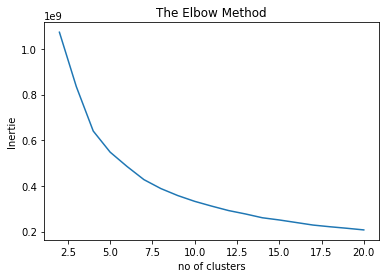

In [16]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(2,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Inertie')
plt.show()

### Réduction dimensionnelle pour visualisation
#### PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

PCA = pd.DataFrame(X_2 , columns=['PC1','PC2'])
print(pca.explained_variance_ratio_)
PCA.head()

[0.69961895 0.16820717]


,PC1,PC2
0,-137.501859,83.684697
1,-179.451381,79.412145
2,-28.304707,-178.314032
3,-156.654943,36.570612
4,-145.072609,82.805081


<Figure size 432x288 with 0 Axes>

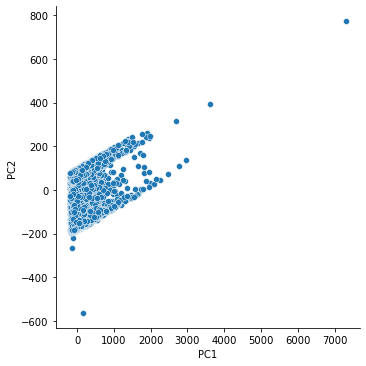

In [36]:
plt.figure()
sns.relplot(x=PCA.PC1, y=PCA.PC2)
plt.show()

#### TSNE

In [39]:
from sklearn.manifold import TSNE

X_reduit = TSNE(n_components=2).fit_transform(X)
TSNE = pd.DataFrame(X_reduit, columns=['TSNE1','TSNE2'])
X_reduit.shape

(30000, 2)

In [40]:
TSNE

,TSNE1,TSNE2
0,15.187488,-73.773476
1,1.846390,-75.413063
2,13.402872,38.020954
3,51.055550,-22.162273
4,-31.922531,-59.510754
...,...,...
29995,-14.274786,6.712696
29996,-5.095918,-72.877525
29997,26.446669,-20.924820
29998,3.992056,3.257652


<Figure size 432x288 with 0 Axes>

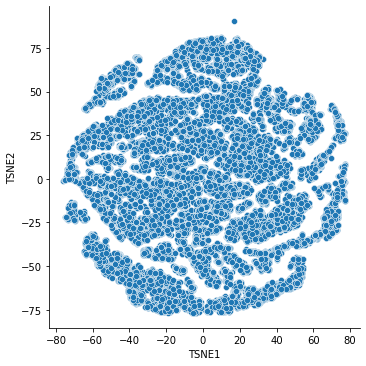

In [41]:
plt.figure()
sns.relplot(x=TSNE.TSNE1, y=TSNE.TSNE2)
plt.show()